In [1]:
%matplotlib widget
from easydynamics.Analysis import Analysis

import numpy as np

from easydynamics.sample import GaussianComponent
from easydynamics.sample import LorentzianComponent
from easydynamics.sample import PolynomialComponent
from easydynamics.sample import SampleModel

from easydynamics.Experiment import Experiment

import matplotlib.pyplot as plt


from easydynamics.Job import Job
from easydynamics.Experiment import Data


In [2]:
MyJob= Job(name='Vanadium sample')

theory= SampleModel('Vanadium Model')
theory.add_component(GaussianComponent(width=0.5e-3,area=5e-5))
theory.add_component(LorentzianComponent(width=2e-3, area=2e-6))

MyJob.set_theory(theory)




experiment=Experiment('Vanadium Experiment')


background=SampleModel('Vanadium Background')
background.add_component(PolynomialComponent(coefficients=[1e-3]))

experiment.set_background_model(background)

experiment.set_resolution_model(None)


data=Data('Vanadium Data')
data.append(data.load_example_vanadium_data_1d())

experiment.set_data(data)

MyJob.set_experiment(experiment)


analysis=Analysis('Vanadium Analysis')

MyJob.set_analysis(analysis)

In [3]:
x,y,e=experiment.extract_xye_data(data)
x

array([-0.029678, -0.02962 , -0.029562, ...,  0.029562,  0.02962 ,
        0.029678], shape=(1024,))

In [4]:
MyJob.fit()

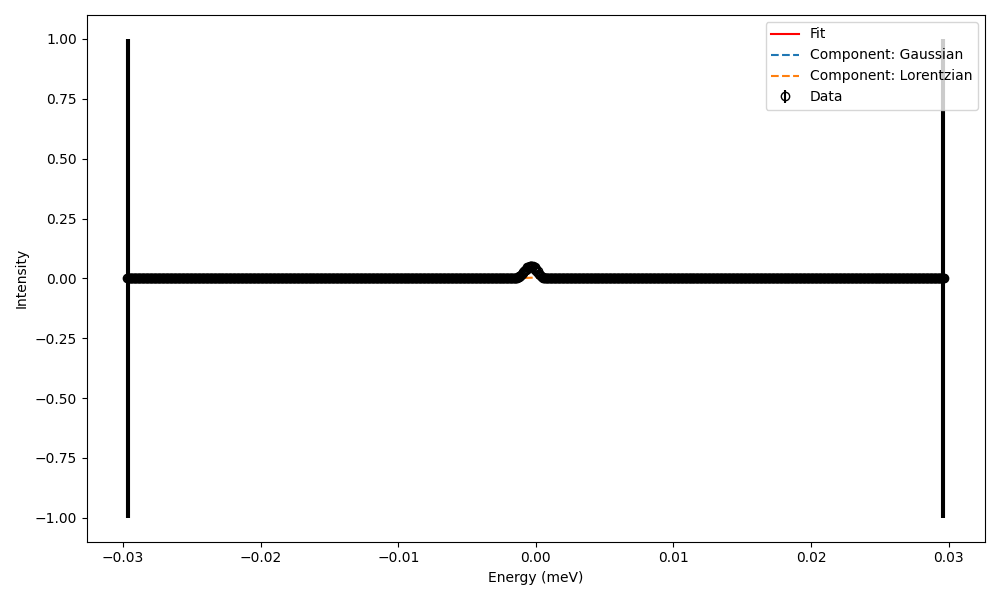

(0.0, 0.07)

In [9]:
fig=MyJob.analysis.plot_data_and_model(plot_individual_components=True)

fig.axes[0].set_xlim(-0.02, 0.02)
fig.axes[0].set_ylim(0, 0.07)

In [10]:
MyJob.analysis.get_parameters()

[<Parameter 'Gaussianarea': 0.0001 ± 0.0000 meV, bounds=[0.0:inf]>,
 <Parameter 'Gaussiancenter': 0.0000 meV (fixed), bounds=[-inf:inf]>,
 <Parameter 'Gaussianwidth': 0.0004 ± 0.0000 meV, bounds=[0.0:inf]>,
 <Parameter 'Lorentzianarea': 0.0000 ± 0.0000 meV, bounds=[-inf:inf]>,
 <Parameter 'Lorentziancenter': 0.0000 meV (fixed), bounds=[-inf:inf]>,
 <Parameter 'Lorentzianwidth': 0.0005 ± 0.0004 meV, bounds=[-inf:inf]>,
 <Parameter 'Polynomial_c0': 0.0002 ± 0.0000 meV, bounds=[-inf:inf]>,
 <Parameter 'offset': -0.0004 ± 0.0000 meV, bounds=[-inf:inf]>]